In [1]:
import sys
import os

sys.path.insert(0, ('/').join(os.getcwd().split('/')[:-1]))
from py_wave_propagator import free_space_prop
from py_wave_propagator import volume_prop

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.ndimage import gaussian_filter, median_filter
import h5py

## Sample 1

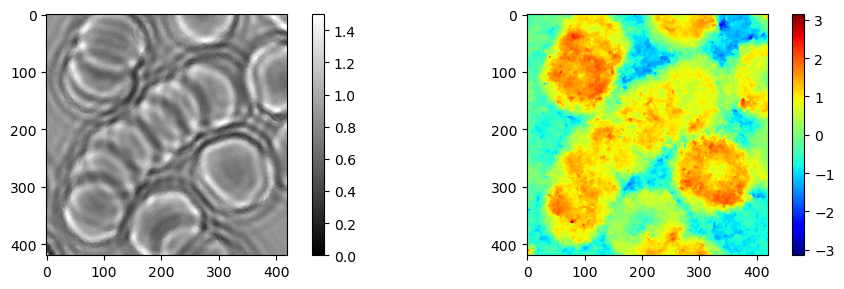

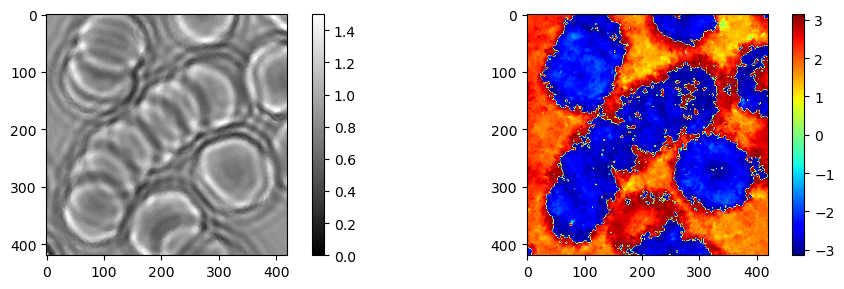

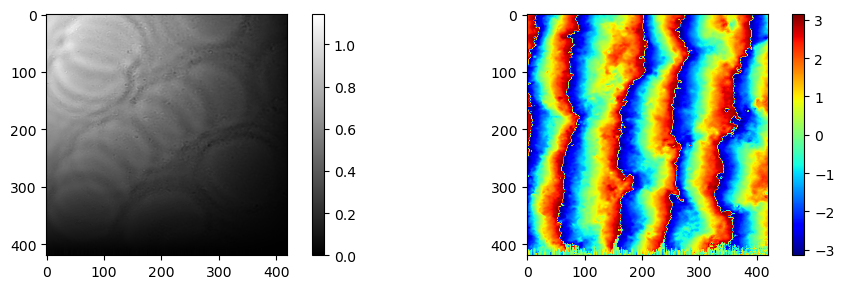

In [39]:
wl = 532*1e-9

# sample
sample_name = '../outputs/Reconstruction/blood_01_01.mat'

A = np.array(h5py.File(sample_name, 'r').get('A'))[200:620, 200:620]
P = gaussian_filter(2*np.pi/wl*np.array(h5py.File(sample_name, 'r').get('phi'))*6.45e-6**2/1.43e-3, 0.3)[200:620, 200:620] # phase in radians

wave_0 = A*np.exp(1j*P)
wave_0 = wave_0.T

wave_obj = free_space_prop.Wave2d(
    numPx = [420, 420], 
    sizePx = [6.45e-6, 6.45e-6], 
    wl = wl
)

wave_obj.wavefield(wave_0)

fig, axs = plt.subplots(1, 2, figsize=(10, 3), tight_layout=True)
cp_amp = axs[0].imshow(np.abs(wave_obj.wavefield_z0)**2, vmax=1.5, vmin=0., cmap='gray')
cp_ang = axs[1].imshow((np.angle(wave_obj.wavefield_z0)), vmin=-1*np.pi, vmax=np.pi, cmap='jet')

plt.colorbar(cp_amp, ax=axs[0])
plt.colorbar(cp_ang, ax=axs[1])

plt.show()

_ = wave_obj.propogate(5e-6)

fig, axs = plt.subplots(1, 2, figsize=(10, 3), tight_layout=True)
cp_amp = axs[0].imshow(np.abs(wave_obj.wavefield_z1)**2, vmax=1.5, vmin=0., cmap='gray')
cp_ang = axs[1].imshow(np.angle(wave_obj.wavefield_z1), vmin=-1*np.pi, vmax=np.pi, cmap='jet')

plt.colorbar(cp_amp, ax=axs[0])
plt.colorbar(cp_ang, ax=axs[1])

plt.show()

# x = np.linspace(0, 420, 420)
# y = np.linspace(0, 420, 420)

# X, Y = np.meshgrid(x, y, indexing='ij')
# Z = 1e-3*X + 1e-3*Y

# seems like non-linear amplitude modulation
# needs to be fixed before use
wavefield_obj = wave_obj.obliquePlaneProp(rotation=[30, 0], degrees=True, samples_ref_spectrum=420*4, shift=False)

fig, axs = plt.subplots(1, 2, figsize=(10, 3), tight_layout=True)
cp_amp = axs[0].imshow(np.abs(wavefield_obj)**0.45, vmin=0., cmap='gray', 
                    #    extent=(0, 420*6.45, 0, 420*6.45)
                       )
cp_ang = axs[1].imshow(np.angle(wavefield_obj), vmin=-1*np.pi, vmax=np.pi, cmap='jet')

plt.colorbar(cp_amp, ax=axs[0])
plt.colorbar(cp_ang, ax=axs[1])
# axs[0].grid()
plt.show()

## Sample 2

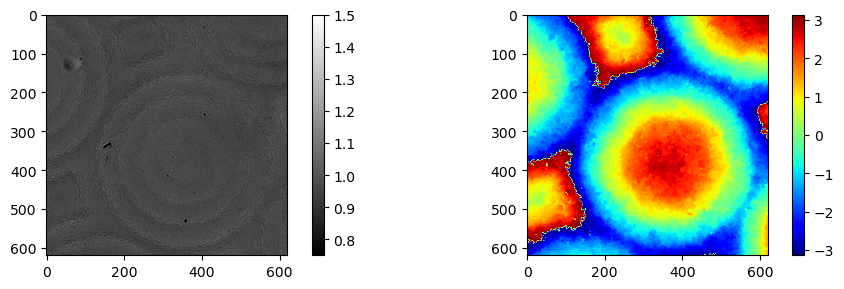

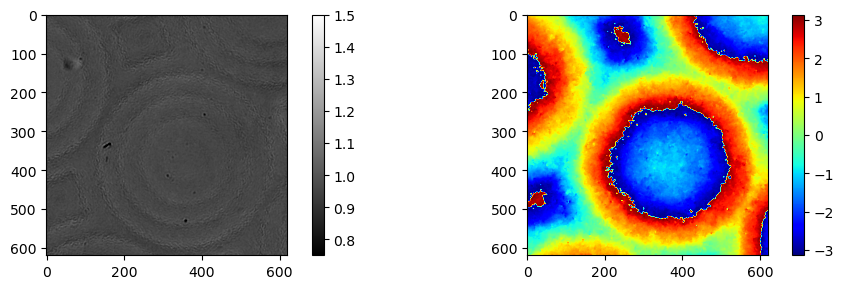

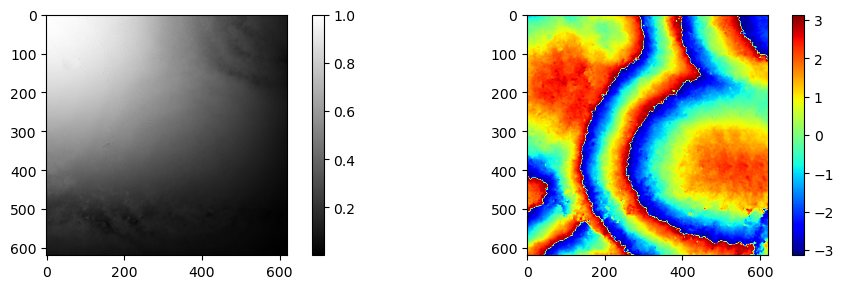

In [30]:
wl = 532*1e-9

sample_name = f'../outputs/Reconstruction/MLA1507ARM_01_01.mat'
 
A = np.array(h5py.File(sample_name, 'r').get('A'))[100:720, 100:720]
P = gaussian_filter(2*np.pi/wl*np.array(h5py.File(sample_name, 'r').get('phi'))*6.45e-6**2/1.43e-3, 0.3)[100:720, 100:720] # phase in radians

wave_0 = A*np.exp(1j*P)
wave_0 = wave_0.T

wave_obj = free_space_prop.Wave2d(
    numPx = [620, 620], 
    sizePx = [6.45e-6, 6.45e-6], 
    wl = wl
)

wave_obj.wavefield(wave_0)

fig, axs = plt.subplots(1, 2, figsize=(10, 3), tight_layout=True)
cp_amp = axs[0].imshow(np.abs(wave_obj.wavefield_z0)**2, vmax=1.5, vmin=0.75, cmap='gray')
cp_ang = axs[1].imshow((np.angle(wave_obj.wavefield_z0)), vmin=-1*np.pi, vmax=np.pi, cmap='jet')

plt.colorbar(cp_amp, ax=axs[0])
plt.colorbar(cp_ang, ax=axs[1])

plt.show()

_ = wave_obj.propogate(5e-6)

fig, axs = plt.subplots(1, 2, figsize=(10, 3), tight_layout=True)
cp_amp = axs[0].imshow(np.abs(wave_obj.wavefield_z1)**2, vmax=1.5, vmin=0.75, cmap='gray')
cp_ang = axs[1].imshow(np.angle(wave_obj.wavefield_z1), vmin=-1*np.pi, vmax=np.pi, cmap='jet')

plt.colorbar(cp_amp, ax=axs[0])
plt.colorbar(cp_ang, ax=axs[1])

plt.show()

# seems like non-linear amplitude modulation
# needs to be fixed before use
wavefield_obj = wave_obj.obliquePlaneProp(rotation=[10, 0], degrees=True, samples_ref_spectrum=640*2, shift=False)

fig, axs = plt.subplots(1, 2, figsize=(10, 3), tight_layout=True)
cp_amp = axs[0].imshow(np.abs(wavefield_obj)**0.45, cmap='gray', vmax=1.
                    #    extent=(0, 420*6.45, 0, 420*6.45)
                       )
cp_ang = axs[1].imshow(np.angle(wavefield_obj), vmin=-1*np.pi, vmax=np.pi, cmap='jet')

plt.colorbar(cp_amp, ax=axs[0])
plt.colorbar(cp_ang, ax=axs[1])
# axs[0].grid()
plt.show()

In [6]:
C = np.abs(wavefield_obj)**2
# 0.5/6.45e-6

# plt.plot(np.fft.fftshift(np.fft.fftfreq(640, 6.45e-6)))